# Thông tin chung

**Mục tiêu**

- Giới thiệu một số loại biểu đồ và các hàm vẽ biểu đồ để mô tả trực quan dữ liệu.

**Kết quả đạt được**

Sinh viên sau khi thực hành sẽ:

- Nắm vững được cách sử dụng các hàm vẽ biểu đồ để trực quan dữ liệu.
- Cài đặt được các ví dụ thực hành.

**Thời gian thực hành:** 3 tiết

**Công cụ thực hành:** Google Colab, Anaconda

# Nội dung lý thuyết

## Một số loại biểu đồ

- Biểu đồ histogram (distribution plot/histogram): biểu diễn tần số xuất hiện của một thuộc tính, cho biết dạng phân phối, miền giá trị của thuộc tính đó
- Biểu đồ cột (bar plot)
- Biểu đồ hộp (box plot): mô tả dạng phân bố và tìm các giá trị ngoại biên/cá biệt của một thuộc tính. Boxplot gồm 5 giá trị như sau:
    - Giá trị nhỏ nhất (min)
    - Tứ phân vị thứ nhất (Q1)
    - Trung vị (median) 
    - Tứ phân vị thứ 3 (Q3) 
    - Giá trị lớn nhất (max)
- Biểu đồ violin (violin plot): biểu diễn nhiều thông tin hơn boxplot.
- Biểu đồ phân tán (scatter plot): thể hiện mối quan hệ giữa hai biến nguyên nhân và kết quả.
- Biểu đồ ma trận (matrixplot): heatmap thường được dùng để biểu diễn ma trận tương quan giữa các thuộc tính.

## Các thư viện vẽ biểu đồ

- matplotlib (https://matplotlib.org/)
- seaborn (https://seaborn.pydata.org/): được phát triển dựa trên matplotlib

# Nội dung thực hành

## Mô tả bài toán

Cho bảng dữ liệu hoa Iris gồm các thuộc tính sau:

- sepal_length: chiều dài đài hoa (cm)
- sepal_width: chiều rộng đài hoa (cm)
- petal_length: chiều dài cánh hoa (cm)
- petal_width: chiều rộng cánh hoa (cm)
- species: 3 loài hoa (setosa, versicolor, virginica)

## Trực quan hóa dữ liệu bài toán

**Đọc dữ liệu từ tập tin iris.csv**

In [5]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris.head()
# iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Biểu diễn tần số xuất hiện của từng thuộc tính tương ứng với mỗi loại hoa.**

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

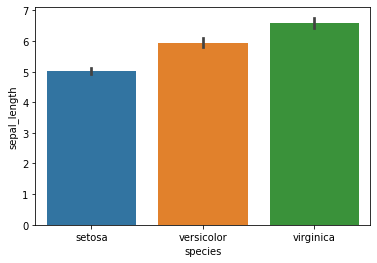

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = 'species', y = 'sepal_length', data = iris)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

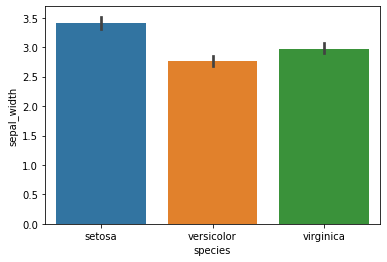

In [6]:
sns.barplot(x = 'species', y = 'sepal_width', data = iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

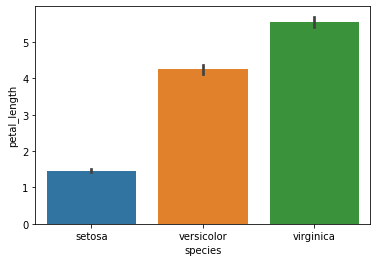

In [7]:
sns.barplot(x = 'species', y = 'petal_length', data = iris)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

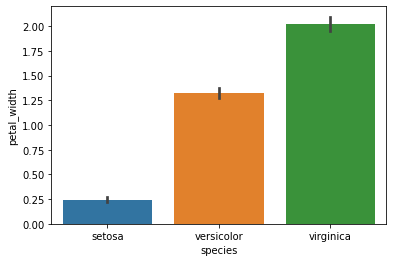

In [8]:
sns.barplot(x = 'species', y = 'petal_width', data = iris)

**Biểu diễn tần suất xuất hiện các giá trị của từng thuộc tính.**

<AxesSubplot:xlabel='sepal_width'>

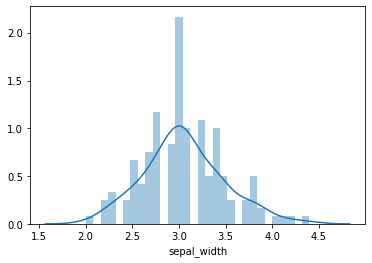

In [22]:
sns.distplot(a = iris['sepal_width'], bins = 30)

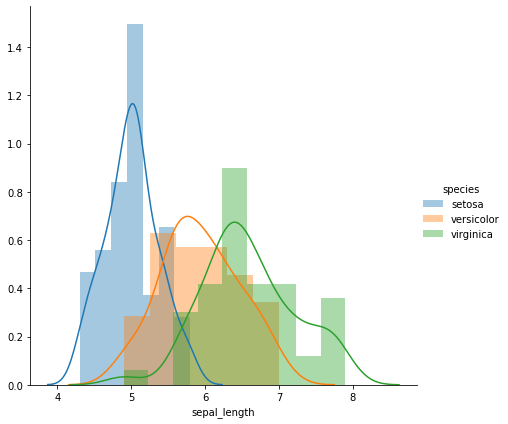

In [8]:
sns.FacetGrid(iris, hue = 'species', height = 6).map(sns.distplot, "sepal_length").add_legend()

**Kiểm tra thuộc tính sepal_length theo từng loại hoa**

- Trục x là biến phân loại
- Trục y là biến liên tục

<AxesSubplot:>

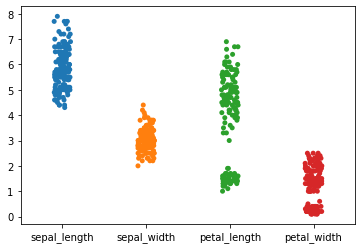

In [9]:
sns.stripplot(data = iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

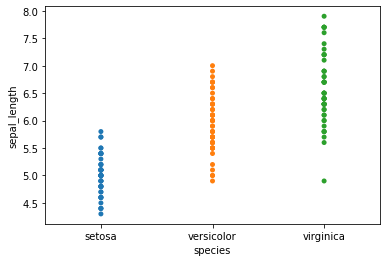

In [10]:
sns.stripplot(x = "species", y = "sepal_length", data = iris, jitter = False)

- Nếu các điểm dữ liệu bị trùng nhau, ta có thể sử dụng hàm swarmplot để vẽ lại biểu đồ trên.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

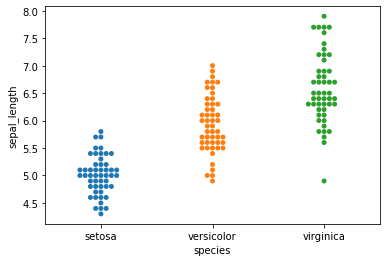

In [11]:
sns.swarmplot(x = "species", y = "sepal_length", data = iris)

- Biểu diễn so sánh số lượng 3 loại hoa.

In [12]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

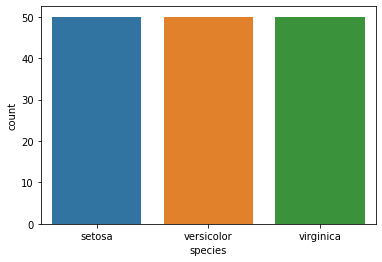

In [13]:
sns.countplot(x = 'species', data = iris)

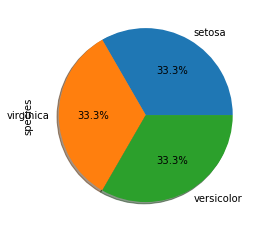

In [29]:
iris['species'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.show()

**Tìm các giá trị ngoại biên/cá biệt của từng thuộc tính.**

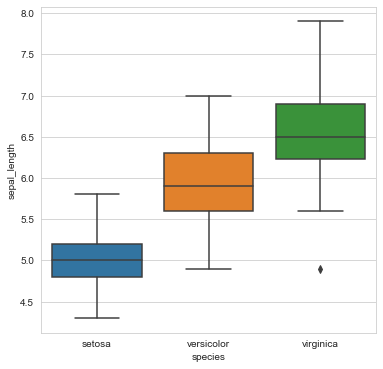

In [14]:
plt.figure(figsize = (6, 6))
sns.set_style('whitegrid')
sns.boxplot(x = "species", y = "sepal_length", data = iris)
plt.show()

*Ta thấy hoa virginica có một giá trị sepal_length ngoại biên.*

In [15]:
iris.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [16]:
Q1 = iris[iris['species']=='virginica']['sepal_length'].quantile(0.25)
Q3 = iris[iris['species']=='virginica']['sepal_length'].quantile(0.75)
IQR = Q3 - Q1
above_outlier = IQR * 1.5 + Q3
below_outlier= Q1 - IQR * 1.5

print('Q1 = ' + str(Q1))
print('Q1 = ' + str(Q3))
print('above_outlier = ' + str(above_outlier))
print('below_outlier = ' + str(below_outlier))

Q1 = 6.2250000000000005
Q1 = 6.9
above_outlier = 7.9125
below_outlier = 5.2125


In [17]:
iris[(iris['species'] == 'virginica') & (iris['sepal_length'] > above_outlier)]['sepal_length'].values

array([], dtype=float64)

In [18]:
iris[(iris['species'] == 'virginica') & (iris['sepal_length'] < below_outlier)]['sepal_length'].values

array([4.9])

*Quan sát thuộc tính sepal_length của hoa virginica, ta thấy:*

- Trung vị chiều dài 6.5 cm
- Khoảng 25% có chiều dài nhỏ hơn 6.225 cm
- Khoảng 75% có chiều dài nhỏ hơn 6.9 cm
- Tìm thấy một giá trị ngoại biên (giá trị có chiều dài 4.9 cm)

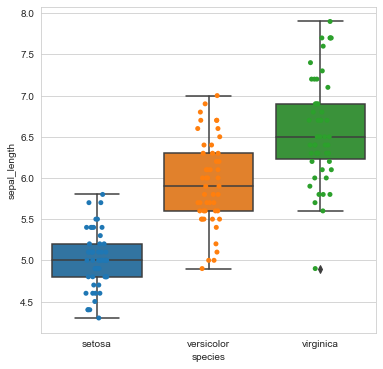

In [19]:
plt.figure(figsize = (6, 6))

sns.set_style('whitegrid')
ax = sns.boxplot(x = 'species', y = 'sepal_length', data = iris)
ax = sns.stripplot(x = 'species', y = 'sepal_length', data = iris)

plt.show()

- Biểu đồ Boxplot có thể bị sai lệch. Khi dữ liệu biến đổi, median và khoảng giá trị vẫn giống nhau.

<!-- ![Alt Text](https://blog.bioturing.com/wp-content/uploads/2018/11/BoxViolin.gif) -->

**Sử dụng violinplot để mô tả các thuộc tính theo loại hoa**

- Xét thuộc tính sepal_length

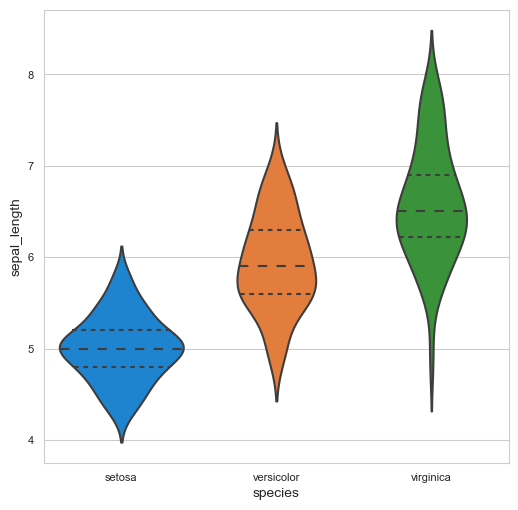

In [31]:
plt.figure(figsize = (6, 6))
sns.set_style('whitegrid')
sns.violinplot(x = 'species', y = 'sepal_length', data = iris, inner='quartile') #inner = 'points', inner='quartile'
plt.show()

- Ta thấy, hoa virginica có sepal_length dài hơn 2 loại còn lại.

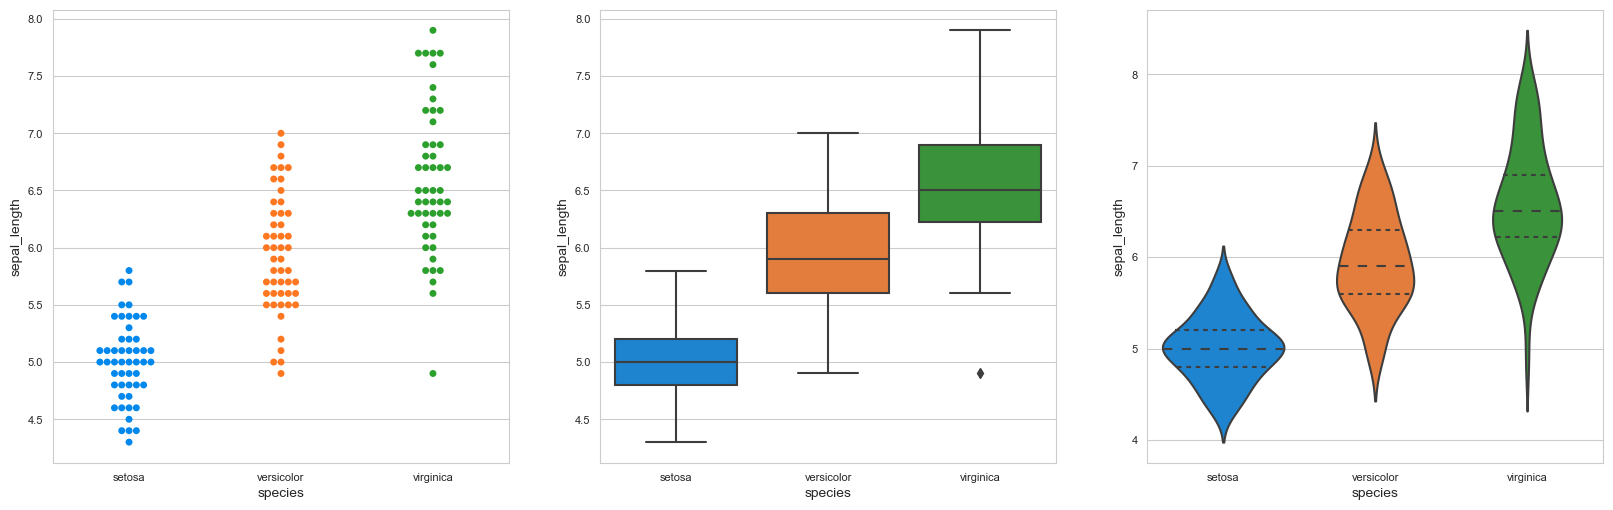

In [38]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 3, 1)
sns.swarmplot('species', 'sepal_length', data=iris);

plt.subplot(1, 3, 2)
sns.boxplot('species', 'sepal_length', data=iris);

plt.subplot(1, 3, 3)
sns.violinplot('species', 'sepal_length', data=iris, inner='quartile');

plt.show()

**Kiểm tra sự tương quan giữa các cặp thuộc tính**

- sepal_length và sepal_width.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

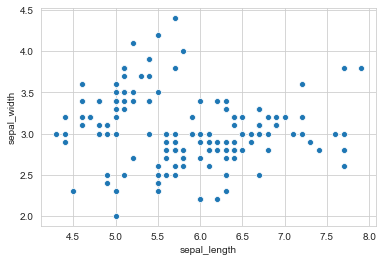

In [22]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = iris)

    - Iris được phân thành 3 lớp khác nhau, nên ta có thể chọn màu sắc tương ứng cho từng loài hoa.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

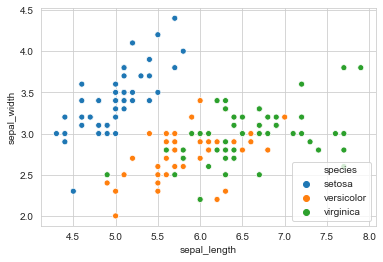

In [23]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)

- sepal_length và petal_length.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

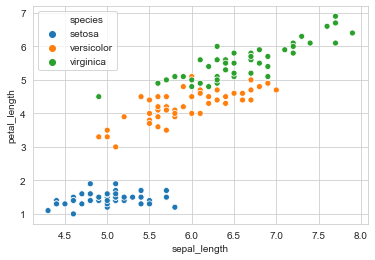

In [24]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', hue = 'species', data = iris)

**Biểu diễn độ tương quan của tất cả các cặp thuộc tính**

In [25]:
corr_matrix = iris.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


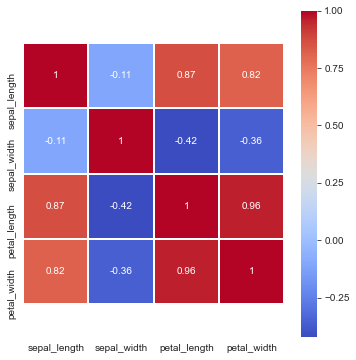

In [26]:
plt.figure(figsize = (6, 6))
ax = sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm', square = True, linewidths = 1)

## Đoạn lệnh sửa lỗi mất dòng đầu, dòng cuối ở phiên bản matplotlib 3.1.1
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##

plt.show()

*Quan sát bản đồ nhiệt ta thấy có 3 cặp thuộc tính có mối tương quan đồng biến:*

    - sepal_length, petal_length: 0.87
    - sepal_length, petal_width: 0.82
    - petal_length, petal_width: 0.96

- Độ tương quan giữa các cặp thuộc tính của loại hoa setosa và versicolor.

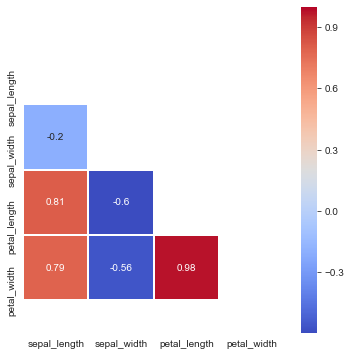

In [27]:
import numpy as np

plt.figure(figsize = (6, 6))
corr_not_virginica = iris[iris['species'] != 'virginica'].corr()
mask = np.tri(*corr_not_virginica.shape).T
ax = sns.heatmap(corr_not_virginica, annot = True, cmap= 'coolwarm', square = True, linewidths = 1, mask = mask)

## Đoạn lệnh sửa lỗi mất dòng đầu, dòng cuối ở phiên bản matplotlib 3.1.1
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##

plt.show()

**Biểu diễn mối quan hệ giữa tất cả các cặp thuộc tính trong dữ liệu.**

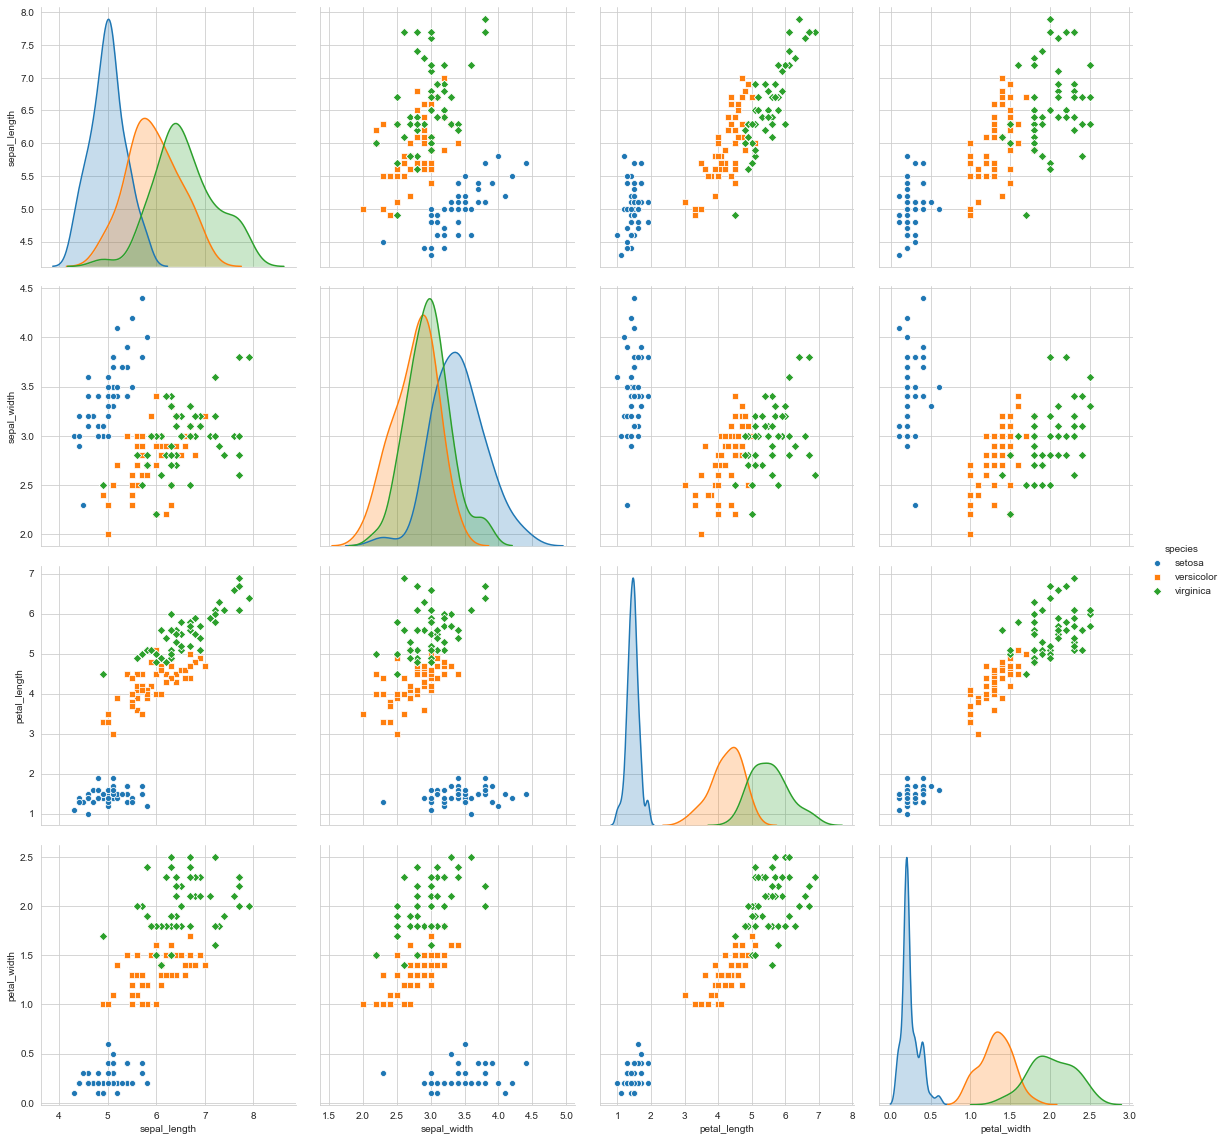

In [28]:
sns.pairplot(iris, hue = 'species', markers = ['o', 's', 'D'], height = 4)

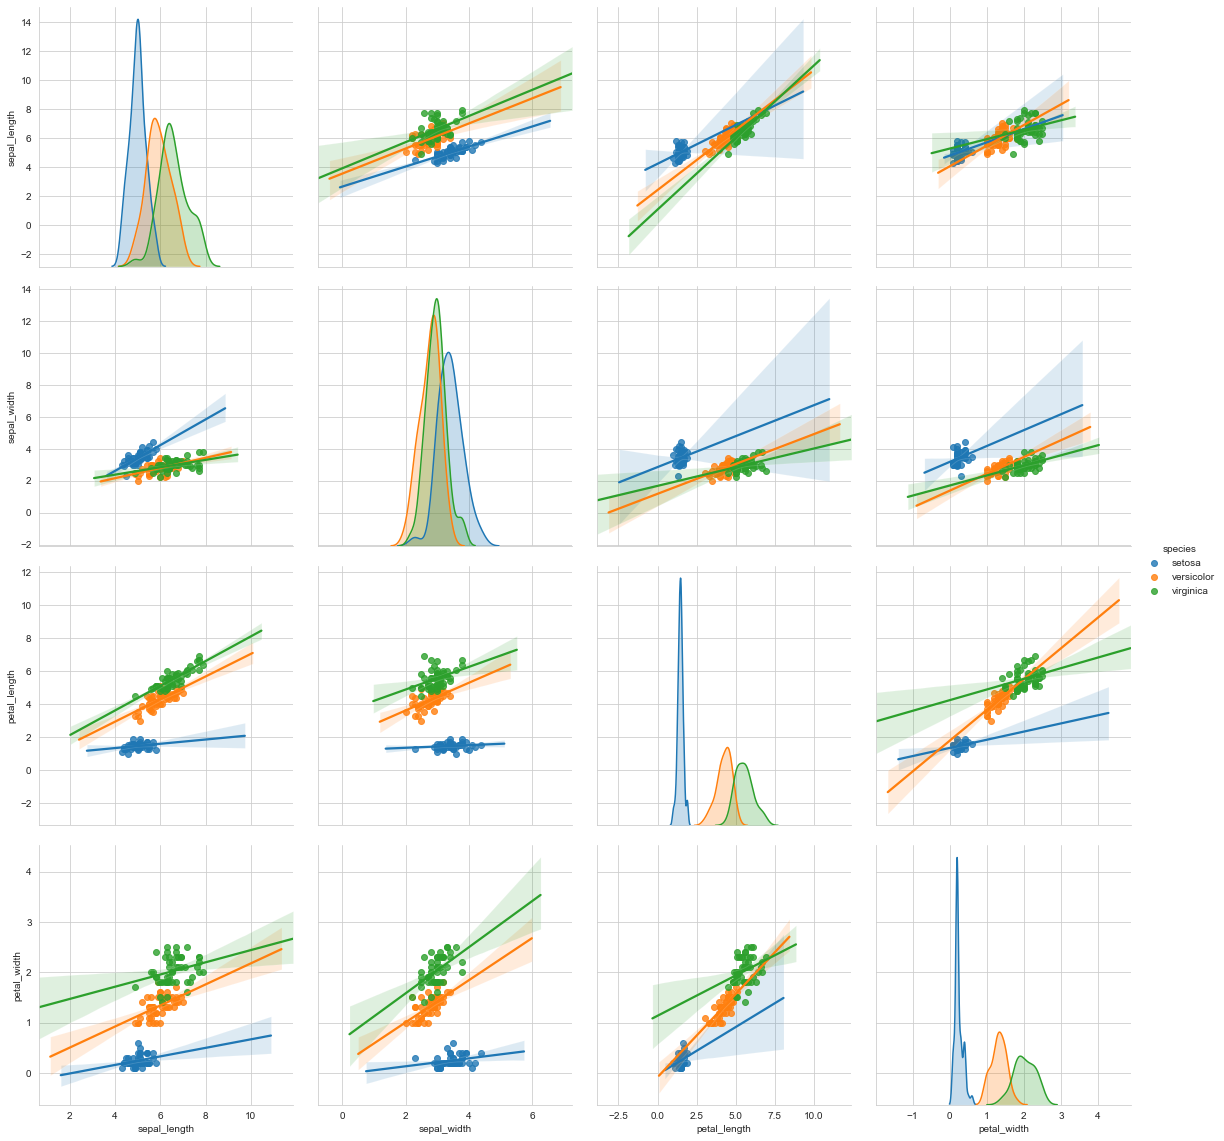

In [29]:
sns.pairplot(iris, kind = 'reg', hue = 'species', height = 4)

In [30]:
import sweetviz as sv

my_report = sv.analyze(iris)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████████| [100%]   00:00  -> (? left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Bài tập

Cho tập dữ liệu các loại Pokemon tại địa chỉ: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6

- Vẽ các loại biểu đồ để trực quan hóa dữ liệu các loại Pokemon. 